# Исследование объявлений о продаже квартир в Санкт-Петербурге

**Описание проекта:**

Имеются данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Необходимо определить рыночную стоимость объектов недвижимости и установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

**Описание данных:**
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

**Исследование проведем по следующему плану:**

- ознакомимся с данными
- проведем предобработку 
- добавим в таблицу столбцы с нужными для дальнейшей работы расчетами
- проведем непосредственно исследовательский анализ данных
- подкрепим общий вывод

## Изучение данных из файла

In [1]:
# импортируем библиотеки pandas и matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

# посмотрим общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
# добавим отображение всех имеющихся в датафреме столбцов
pd.set_option('display.max_columns', 50)

# посмотрим на данные
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# посмотрим описание данных
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Вывод:**

Итак, после первоначального анализа имеем 22 столбца и 23699 строк. 

Из важного - у большинства столбцов есть пропущенные значения, также заданы некорректные типы данных:
* `first_day_exposition` - заменим тип object на тип datetime
* `floors_total` - пропущенные значения + заменим на тип int, т.к. количество этажей - это целое значение  
* `is_apartment` - пропущенные значения + заменим на тип bool
* `balcony` - пропущенные значения + заменим на тип int, т.к. количество балконов - это целое значение
* `parks_around3000` - пропущенные значения + заменим на тип int 
* `ponds_around3000` - пропущенные значения + заменим на тип int 
* `days_exposition` - пропущенные значения + заменим на тип int
* `last_price` - заменим на тип int, т.к. нам не нужна точность до копеек


* `ceiling_height` - пропущенные значения 
* `living_area` - пропущенные значения
* `kitchen_area` - пропущенные значения
* `locality_name` - пропущенные значения
* `airports_nearest` - пропущенные значения
* `cityCenters_nearest` - пропущенные значения
* `parks_nearest` - пропущенные значения
* `ponds_nearest` - пропущенные значения

## Предобработка данных

Нам нужно заменить типы данных на корректные и заполнить пропущенные значения. Но так как в большинстве случаев первое не получится сделать без второго, то начнем именно с заполнения пропусков.

In [5]:
# для удобства, выведем количество пропусков перед глазами
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# очевидно, что наличие балкона указали бы в объявлении, поэтому пропуски в значении balcony заполним `0`
data['balcony'] = data['balcony'].fillna(0)

# пропуск в значении is_apartment скорее всего обозначает, что помещение - не аппартаменты, поэтому заполним их False
data['is_apartment'] = data['is_apartment'].fillna(False)

# пропусков количества этажей floors_total имеется меньше 1 %, поэтому их проще полностью убрать
data.dropna(subset=['floors_total'], inplace=True)

# аналогичным образом поступим с пропусками в названии населенного пункта locality_name, так как их еще меньше, чем floors_total
data.dropna(subset=['locality_name'], inplace=True)

# интересная ситуация с наличием парков и прудов в пределах 3-х км
# напротив пропущенного значения отсутсвует и расстояние до парка/пруда, можем заполнить пропуски `0`
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

# высоту потолков ceiling_height заполним медианным значением
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

# заменим пустые значения жилой площади как отношение медианого значения жилой площади к общей
living_area_ratio = data['living_area'].median() / data['total_area'].median()
data['living_area'].fillna(living_area_ratio * data['total_area'], inplace=True)

# аналогичным способом поступим со значениями площади кухни
kitchen_area_ratio = data['kitchen_area'].median() / data['total_area'].median()
data['kitchen_area'].fillna(kitchen_area_ratio * data['total_area'], inplace=True)

Пропуски заполнили, теперь скорректируем типы данных.

In [7]:
# заменим тип object на тип datetime в first_day_exposition
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# заменим тип float64 на int в floors_total , т.к. количество этажей - это целое значение
data['floors_total'] = data['floors_total'].astype('int')

# заменим тип float64 на int в balcony, т.к. количество балконов - это целое значение
data['balcony'] = data['balcony'].astype('int')

# заменим тип float64 на int в parks_around3000 и ponds_around3000, т.к. количество парков и прудов - это также целые значения
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

# заменим тип float64 на int в last_price, т.к. нам не нужна точность до копеек
data['last_price'] = data['last_price'].astype('int')

# проверим типы данных всей таблицы
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

**Вывод:**

Итак, предобработка проведена - заполнены пропуски и изменены типы данных, там где значения должны быть целочисленными.
За исключение столбца days_exposition, так как наличие пропусков показывает актуальность продажи квартир. 

Дату публикации объявления привели к более удобному для работы формату.

Условие is_apartment привели, как и полагается, к булеву типу.

## Расчёты и добавление результатов в таблицу

Добавим новые параметры:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой к общей площади, а также отношение площади кухни к общей.

In [8]:
# добавим столбец с ценой квадратного метра, сразу приведем к int
data['square_metre_price'] = (data['last_price'] / data['total_area']).astype('int')

# добавим столбцы дня недели, месяца и года публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

# добавим столбец с этажностью, применим функцию категоризации с вариантами: первый, последний, другой
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
data['floor_category'] = data.apply(floor_category, axis=1)

# добавляем столбцы соотношения жилой площади к общей, а также отношение площади кухни к общей
data['living_area_ratio'] = data['living_area'] / data['total_area'] 
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area'] 

In [9]:
# посмотрим на обновленные данные
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_metre_price,weekday_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.000,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,False,False,8.300,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14,91.730769,9,False,False,False,27.825,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176,4,7,2015,другой,0.576923,0.175000
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000


**Вывод:**

Провели расчеты необходимых данных в дальнейшем и добавили в датафрейм. Можем переходить к исследовательскому анализу.

## Исследовательский анализ данных

### Изучение параметров площади, цены, числа комнат, высоты потолков.

Помимо построения гистрограммы для изучения параметров,  будем применять функцию describe для каждого параметра.

In [10]:
# посмотрим на распределение значений всех площадей
data[['total_area', 'living_area', 'kitchen_area']].describe()

,total_area,living_area,kitchen_area
count,23565.000000,23565.000000,23565.000000
mean,60.322824,34.621108,10.499499
std,35.657060,22.399827,6.037444
min,12.000000,2.000000,1.300000
25%,40.000000,19.000000,7.000000
50%,52.000000,30.000000,9.000000
75%,69.700000,42.115385,12.000000
max,900.000000,409.700000,112.000000


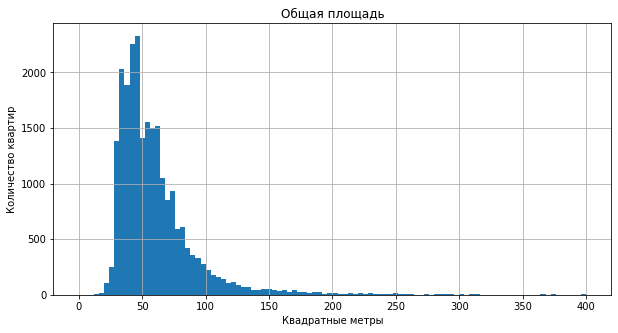

In [11]:
# построим гистограму для общей площади
data['total_area'].hist(bins=100, range=(0,400), figsize=(10,5))
plt.title('Общая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

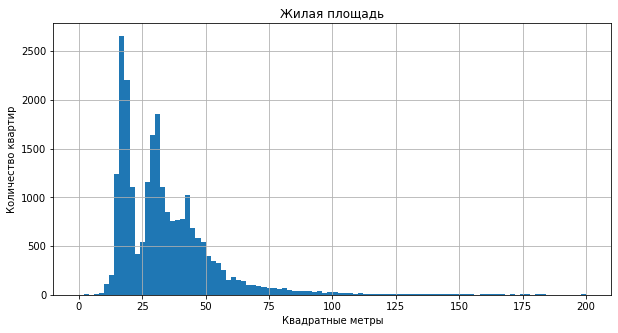

In [12]:
# строиим гистограму для жилой площади
data['living_area'].hist(bins=100, range=(0, 200), figsize=(10,5))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

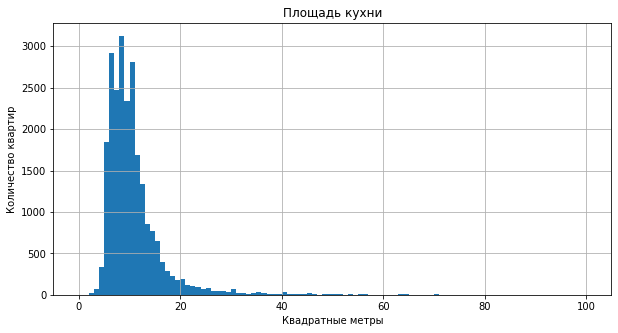

In [13]:
# строим гистограму для площади кухни
data['kitchen_area'].hist(bins=100, range=(0, 100), figsize=(10,5))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

In [14]:
# проверим стоимость квартир и стоимость квадратного метра
data[['last_price', 'square_metre_price']].describe()

,last_price,square_metre_price
count,2.356500e+04,2.356500e+04
mean,6.540058e+06,9.940539e+04
std,1.091093e+07,5.038944e+04
min,1.219000e+04,1.110000e+02
25%,3.400000e+06,7.656600e+04
50%,4.646000e+06,9.500000e+04
75%,6.790000e+06,1.142130e+05
max,7.630000e+08,1.907500e+06


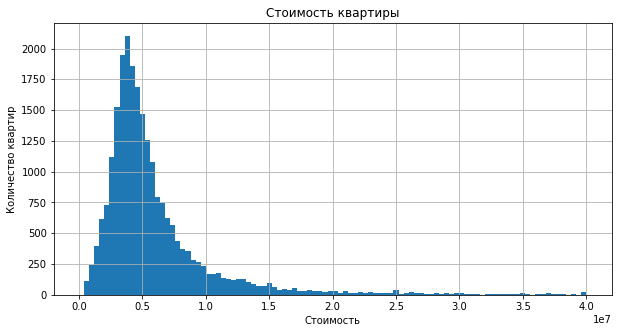

In [15]:
# строим гистограму для стоимости квартир
data['last_price'].hist(bins=100, range=(0,40000000), figsize=(10,5))
plt.title('Стоимость квартиры')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

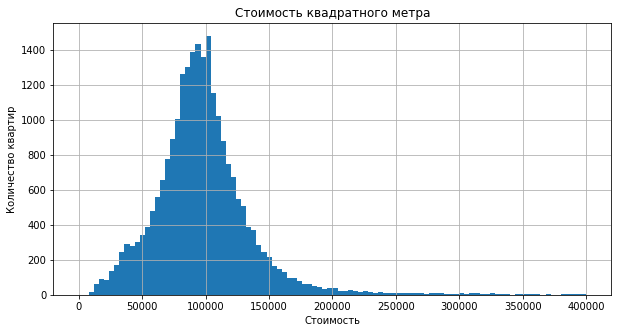

In [16]:
# строим гистограму для стоимости квадратного метра
data['square_metre_price'].hist(bins=100, range=(0,400000), figsize=(10,5))
plt.title('Стоимость квадратного метра')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

In [17]:
# проверим количество комнат
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

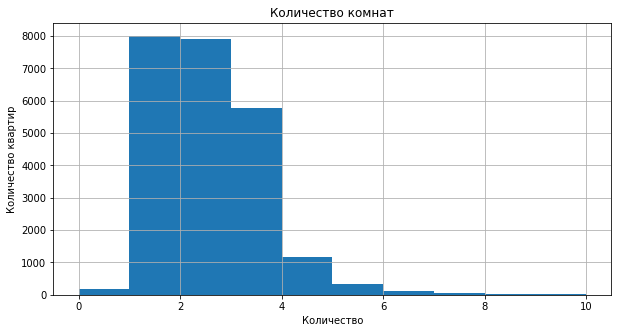

In [18]:
# строим гистограмму по количеству комнат
data['rooms'].hist(bins=10, range=(0,10), figsize=(10,5))
plt.title('Количество комнат')
plt.xlabel('Количество')
plt.ylabel('Количество квартир')
plt.show()

In [19]:
# проверим высоту потолков
data['ceiling_height'].describe()

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

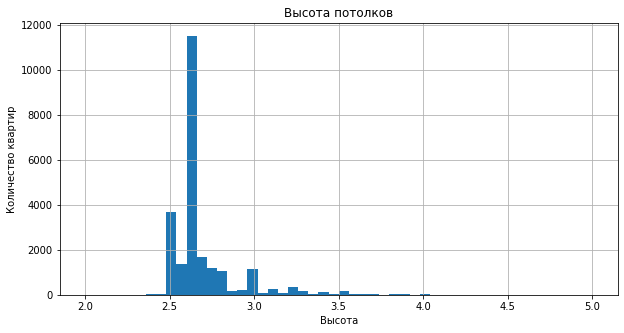

In [20]:
# строим гистограмму для высоты потолков
data['ceiling_height'].hist(bins=50, range=(2,5), figsize=(10,5))
plt.title('Высота потолков')
plt.xlabel('Высота')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:**
* В основной массе можно выделить квартиры общей площадью от 25 от 100 квадратных метров. 
* На графике жилой площади выбиваются два пика: на 20 и 27 метрах. Наиболее вероятно - это 1 и 2-х комнатные квартиры.
* Кухни по площади в большинстве случаев не выходят за пределы 5-20 метров. 
* Стоимость квартир больше всего находится в районе 4 млн. рублей.
* Стоимость за квадратный метр имеет нормальное распределение примерно с 24 до 200 тыс. рублей.
* Квартиры в основном предствалены 1, 2 и 3-х комнатными. Есть небольшое количество 4 и 5-ти комнатных. Больше - уже редкость.
* Высота потолков варьируется от 2,5 до 3 метров.

### Изучение времени продажи квартиры. 

Так как ранее мы решили, что наличие пропусков в столбце `время продажи квартиры` означает актуальность продажи, то имеет смысл не брать в расчет эти объявления. 

In [21]:
# введем новую переменную для исследования `days_exposition` без нулевых значений
data_closed = data[data['days_exposition'].notnull()]

# посмотрим, с чем будем работать
data_closed['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

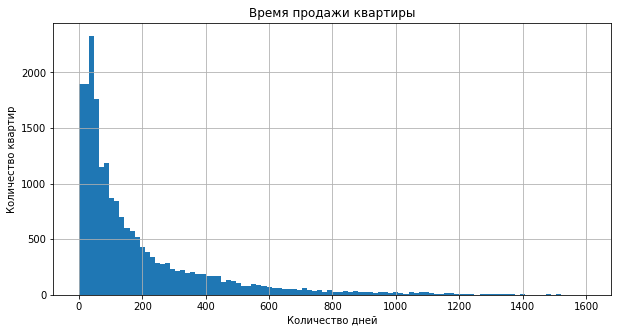

In [22]:
# построим гистограму для времени продажи квартиры
data_closed['days_exposition'].hist(bins=100, range=(0,1600), figsize=(10,5))
plt.title('Время продажи квартиры')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:**
* На гистограмме явно видно распределение Пуассона. 
* Медианное значение равно 95 дням, практически в два раза меньше среднего - 180 дней.
* Обычно квартиры продаются в срок до 100 дней. При этом можно быстрой можно считать продажу до 45 дней, а долгой - свыше 231 дня.


### Обработка редких и выбивающихся значений.

Построим диаграмы размаха при помощи `boxplot` и определим границы выбивающихся значений. Пройдемся по всем параметрам из пунктов 4.1 и 4.2.
Для более удобной анализа, будем менять масштаб оси ординат при помощи ylim()

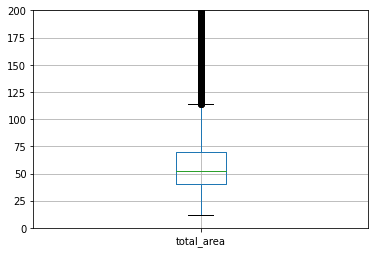

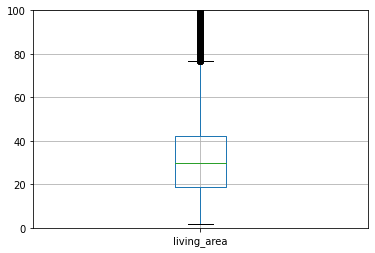

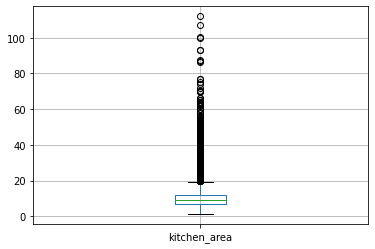

In [23]:
# начнем с общем площади квартиры
data.boxplot(column='total_area')
plt.ylim(0,200)
plt.show()

# жилая площадь
data.boxplot(column='living_area')
plt.ylim(0,100)
plt.show()

# площидь кухни
data.boxplot(column='kitchen_area')
plt.show()

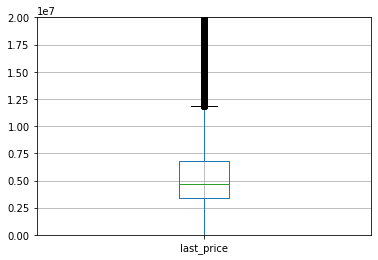

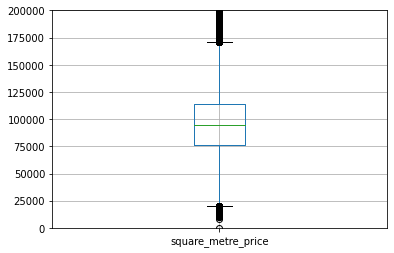

In [24]:
# стоимось квартиры 
data.boxplot(column='last_price')
plt.ylim(0,20000000)
plt.show()

# стоимость одного квадратного метра
data.boxplot(column='square_metre_price')
plt.ylim(0,200000)
plt.show()

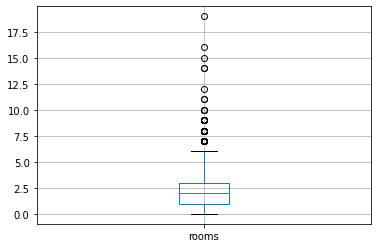

In [25]:
# число комнат 
data.boxplot(column='rooms')
plt.show()

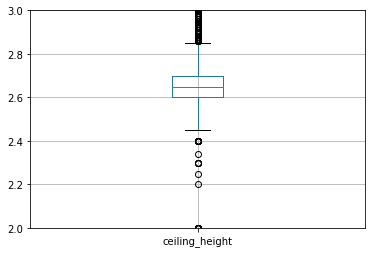

In [26]:
# высота потолков 
data.boxplot(column='ceiling_height')
plt.ylim(2,3)
plt.show()

In [27]:
# избавимся от выбросов
data = data[data['total_area'] < 300]
data = data[data['living_area'] < 150]
data = data[data['kitchen_area'] < 40]
data = data[data['last_price'] < 35000000]
data = data[(data['square_metre_price'] < 350000) & (data['square_metre_price'] > 10000)]
data = data[data['rooms'] < 10 ]
data = data[(data['ceiling_height'] <= 5) & (data['ceiling_height'] > 2.2)]
# проверим, что получилось 
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_metre_price,weekday_exposition,month_exposition,year_exposition,living_area_ratio,kitchen_area_ratio
count,23084.000000,2.308400e+04,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000,17598.000000,17618.000000,23084.000000,7724.000000,23084.000000,8717.000000,20037.000000,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000
mean,9.834084,5.691672e+06,57.636658,2.028721,2.690042,10.734751,33.108246,5.889837,10.069105,0.594481,28833.263610,14372.036270,0.454341,493.464656,0.573687,523.363772,178.927185,96271.560995,2.566583,6.401057,2017.376495,0.566119,0.185976
std,5.650895,4.004130e+06,26.081422,0.995375,0.203738,6.612739,17.157275,4.889025,4.556490,0.958999,12734.018415,8591.315318,0.732723,341.241211,0.868558,277.879740,217.757803,35017.447982,1.789352,3.493435,1.031978,0.100066,0.067821
min,0.000000,4.300000e+05,12.000000,0.000000,2.250000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,10185.000000,0.000000,1.000000,2014.000000,0.038462,0.025381
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18450.000000,9593.000000,0.000000,289.000000,0.000000,303.000000,45.000000,76228.500000,1.000000,3.000000,2017.000000,0.500763,0.137472
50%,9.000000,4.600000e+06,51.300000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26812.000000,13219.000000,0.000000,456.000000,0.000000,507.000000,94.000000,94539.500000,3.000000,6.000000,2017.000000,0.576923,0.175000
75%,14.000000,6.600000e+06,68.000000,3.000000,2.700000,16.000000,41.900000,8.000000,11.630000,1.000000,37407.000000,16383.000000,1.000000,614.000000,1.000000,734.000000,228.000000,113186.500000,4.000000,10.000000,2018.000000,0.631579,0.223777
max,50.000000,3.497900e+07,284.000000,8.000000,5.000000,60.000000,149.400000,33.000000,39.900000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,345000.000000,6.000000,12.000000,2019.000000,1.000000,0.787879


In [28]:
# посмотрим сколько убрали выбросов в процентах от общего колличества строк
dump_ratio = 1 - (23055/23699)
display(f'Количество удаленных строк равно {dump_ratio:.2%}')

'Количество удаленных строк равно 2.72%'

**Вывод:**

Отбросив выбивающиеся значения, можем двигаться дальше, не боясь за неправдободоные результаты.

### Факторы, влияющие на стоимость квартиры.

Проверим, как зависит цена квартиры от:
* площади;
* числа комнат;
* удаленности от центра;
* этажа;
* даты размещения объявления.

Коэфициент корреляции равен 0.7885694937295116


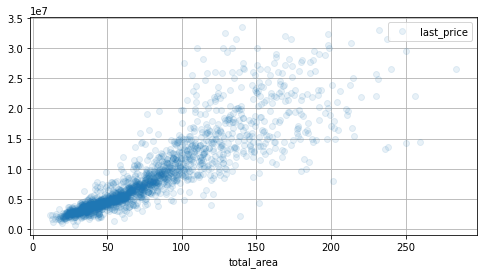

In [29]:
# посмотрим на коэфициент корреляции Пирсона
print(F"Коэфициент корреляции равен {data['last_price'].corr(data['total_area'])}")

# построим диаграмму рассеяния
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(8, 4), alpha=0.1)
plt.show()

Коэфициент корреляции равен 0.5076330527331755


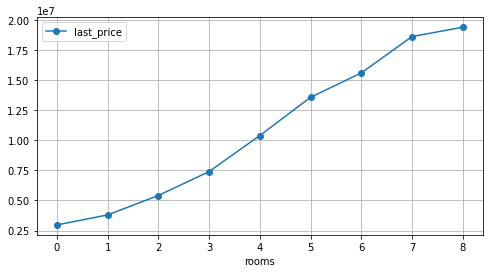

In [30]:
# коэфициент корреляции Пирсона для числа комнат
print(F"Коэфициент корреляции равен {data['last_price'].corr(data['rooms'])}")

# построим диаграмму рассеяния
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(8, 4))
plt.show()

Коэфициент корреляции равен -0.34437247354989714


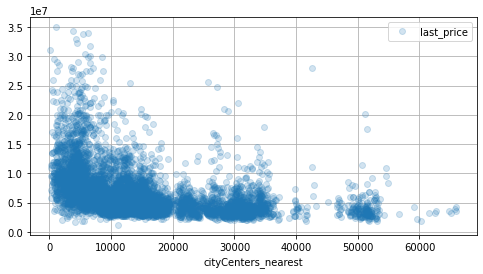

In [31]:
# коэфициент корреляции Пирсона для удаленности от центра
print(F"Коэфициент корреляции равен {data['last_price'].corr(data['cityCenters_nearest'])}")

# построим диаграмму рассеяния
data.pivot_table(index='cityCenters_nearest', values='last_price').plot(grid=True, style='o', figsize=(8, 4), alpha=0.2)
plt.show()

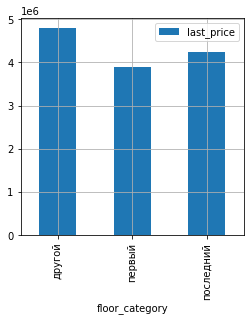

In [32]:
# для категорий этажей построим столбчатую диаграмму
data.pivot_table(index='floor_category', values='last_price', aggfunc='median').plot(grid=True, kind='bar', figsize=(4, 4))
plt.show()

Коэфициент корреляции равен -0.01832025933655774


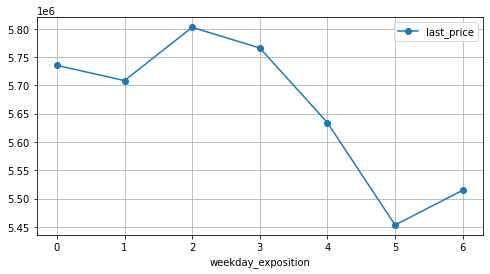

In [33]:
# коэфициент корреляции Пирсона цены квартиры для дня недели
print(F"Коэфициент корреляции равен {data['last_price'].corr(data['weekday_exposition'])}")

# построим диаграмму рассеяния
data.pivot_table(index='weekday_exposition', values='last_price').plot(grid=True, style='o-', figsize=(8, 4))
plt.show()

Коэфициент корреляции равен 0.0038601568717160605


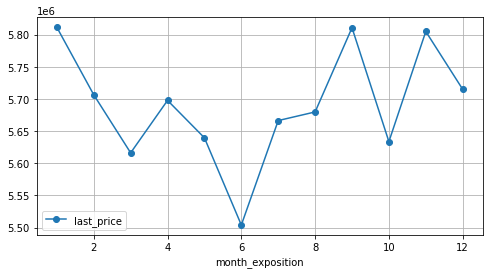

In [34]:
# коэфициент корреляции Пирсона цены квартиры для месяца в году
print(F"Коэфициент корреляции равен {data['last_price'].corr(data['month_exposition'])}")

# построим диаграмму рассеяния
data.pivot_table(index='month_exposition', values='last_price').plot(grid=True, style='o-', figsize=(8, 4))
plt.show()

Коэфициент корреляции равен -0.035212680790885936


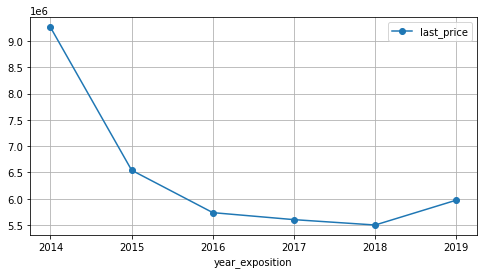

In [35]:
# коэфициент корреляции Пирсона цены квартиры по годам
print(F"Коэфициент корреляции равен {data['last_price'].corr(data['year_exposition'])}")

# построим диаграмму рассеяния
data.pivot_table(index='year_exposition', values='last_price').plot(grid=True, style='o-', figsize=(8, 4))
plt.show()

Дополнительно посмотрим, как зависит стоимость квадратного метра от даты размещения объявления.

Коэфициент корреляции равен -0.013933886743530393


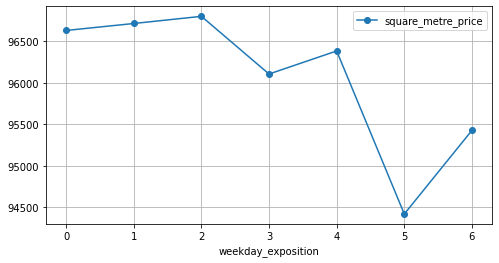

In [36]:
# коэфициент корреляции Пирсона стоимости квадратного метра по дням недели
print(F"Коэфициент корреляции равен {data['square_metre_price'].corr(data['weekday_exposition'])}")

# построим диаграмму рассеяния
data.pivot_table(index='weekday_exposition', values='square_metre_price').plot(grid=True, style='o-', figsize=(8, 4))
plt.show()

Коэфициент корреляции равен -0.0019676847074513444


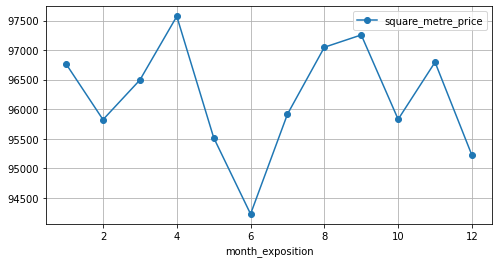

In [37]:
# коэфициент корреляции Пирсона стоимости квадратного метра для месяца в году
print(F"Коэфициент корреляции равен {data['square_metre_price'].corr(data['month_exposition'])}")

# построим диаграмму рассеяния
data.pivot_table(index='month_exposition', values='square_metre_price').plot(grid=True, style='o-', figsize=(8, 4))
plt.show()

Коэфициент корреляции равен 0.043268975178207665


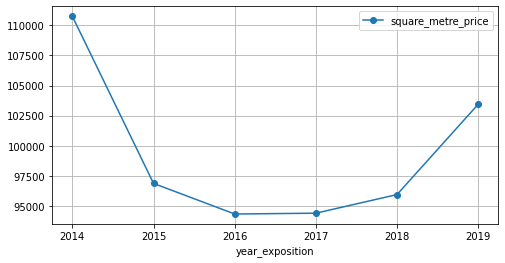

In [38]:
# коэфициент корреляции Пирсона стоимости квадратного метра по годам
print(F"Коэфициент корреляции равен {data['square_metre_price'].corr(data['year_exposition'])}")

# построим диаграмму рассеяния
data.pivot_table(index='year_exposition', values='square_metre_price').plot(grid=True, style='o-', figsize=(8, 4))
plt.show()

**Вывод:**
* Наибольшая зависимость цены квартиры наблюдается от общей площади (коэф. кор. равен 0.78).
* Чуть меньше на цену влияет количество комнат (коэф. кор. равен 0.5), но все же этого достачно много. 
* Еще меньше имеет влияние степень удаленности расположения квартиры от центра (коэф. кор. равен - 0.34). Чем дальше квартира, тем меньше она стоит.
* Квартиры на первом и последнем этажах котируются чуть меньше, чем на любом другом, хотя разница не существенна.
* От чего не зависит цена, так это даты размещения объявления. Коэффициенты корреляции здесь близки к 0.

**Доп. вывод по зависимости стоимости квадратного метра от времени размещения:**
* Коэффициенты корреляции также стремятся к околонулевому значению. Поэтому, стоимость квадратного метра, как и всей квартиры не зависит от даты продажи квартиры. Однако, зная ситуцию в стране с момента начала кризиса 2014 года, могу предположить, что падение цен было связано именно с этим событием.

### Исследование стоимости жилья  10 самых населенных пунктов.

In [39]:
# создадим список из 10 город с наибольшим количеством объявлений
top_10_cities = data.pivot_table(index='locality_name', values='square_metre_price', aggfunc='count')
top_10_cities.columns = ['count']
top_10_cities = top_10_cities.sort_values(by='count', ascending = False).head(10)
# проверим
top_10_cities

,count
locality_name,
Санкт-Петербург,15212
посёлок Мурино,517
посёлок Шушары,438
Всеволожск,396
Пушкин,361
Колпино,337
посёлок Парголово,327
Гатчина,306
деревня Кудрово,299


In [40]:
# теперь отсортируем список по стоимости квадратного метра
top_square_metre_price = (data.query('locality_name in @top_10_cities.index')
                          .pivot_table(index='locality_name', values=['square_metre_price'], aggfunc='mean')
                          .sort_values(by='square_metre_price', ascending=False)
)    
# проверим
top_square_metre_price                                  

,square_metre_price
locality_name,
Санкт-Петербург,110517.040955
Пушкин,102769.224377
деревня Кудрово,92473.086957
посёлок Парголово,90175.489297
посёлок Мурино,85644.313346
посёлок Шушары,78576.554795
Колпино,75332.866469
Гатчина,68757.225490
Всеволожск,67275.159091


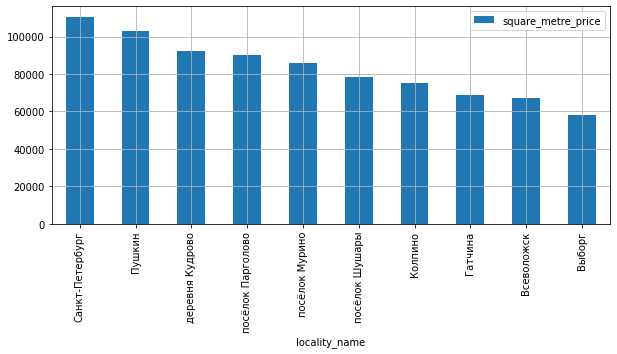

In [41]:
# построим столбчатую диаграмму для визуального анализа
top_square_metre_price.plot(grid=True, kind='bar', figsize=(10, 4))
plt.show()

**Вывод:**

Из нашей выборки, ожидаемо, самое дорогое жилье в Санкт-Петербурге.

Самое дешевые квартиры в Выборге. Разница с Санкт-Петербургом практически в два раза.

### Изучение предложений квартир по расстоянию до центра Санкт-Петербурга

<AxesSubplot:xlabel='cityCenters_nearest_km'>

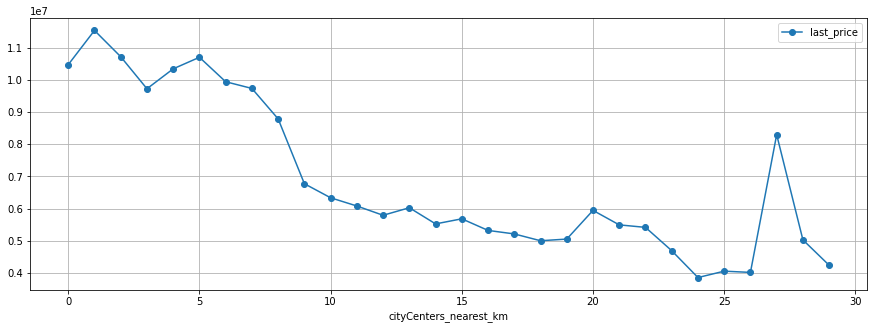

In [42]:
# добавим столбец с расстоянием до центра в километрах
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round()
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(value=0).astype('int')

# сделаем выборку предложений для Санкт-Петербурга
data_spb = data.query('locality_name == "Санкт-Петербург"')
(data_spb.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')
    .plot(style='o-', grid=True, figsize=(15,5))
)                                       

**Вывод:**

Судя по графику - граница центра города находится на 8 км, так как наблюдается довольно резкий спад цены.

На расстоянии с 9 по 19 км от центра идет плавное снижение стоимости. При этом все же наблюдаются резкие скачки. Возможно, это обусловленно привлекательностью данных районов.

### Анализ сегмента квартир в центре Санкт-Петербурга

* Выделим сегмент квартир в центре. 
* Изучим следующие параметры: площадь, цена, число комнат, высота потолков. 
* Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 
* Сравним данные сегмента квартир в центре со всеми квартирами по городу.

In [43]:
# сохраним отдельный сегмент квартир для центра города
data_spb_center = data_spb.query('cityCenters_nearest_km <= 8')

# для наглядного сравнения объеденим данные из центра города с данными по всему городу
(data_spb[['total_area', 'last_price', 'rooms', 'ceiling_height']]
         .join(data_spb_center[['total_area', 'last_price', 'rooms', 'ceiling_height']], rsuffix='_center')
         .describe())

,total_area,last_price,rooms,ceiling_height,total_area_center,last_price_center,rooms_center,ceiling_height_center
count,15212.000000,1.521200e+04,15212.000000,15212.000000,3813.000000,3.813000e+03,3813.000000,3813.000000
mean,60.915547,6.828288e+06,2.113200,2.713516,79.512253,1.010246e+07,2.602937,2.895416
std,28.404019,4.300783e+06,1.038762,0.226704,36.251869,5.779309e+06,1.207363,0.328184
min,12.000000,1.190000e+06,0.000000,2.300000,12.000000,1.600000e+06,0.000000,2.400000
25%,41.500000,4.200000e+06,1.000000,2.600000,53.000000,6.200000e+06,2.000000,2.650000
50%,54.000000,5.450000e+06,2.000000,2.650000,72.000000,8.500000e+06,3.000000,2.750000
75%,72.000000,7.800000e+06,3.000000,2.750000,97.700000,1.210000e+07,3.000000,3.100000
max,284.000000,3.497900e+07,8.000000,4.800000,284.000000,3.497900e+07,8.000000,4.800000


Посмотрим, как зависит цена на квартиры от других параметров, применив коэффициент корреляции.

In [44]:
data_spb_center[['rooms', 'floor', 'cityCenters_nearest_km', 'year_exposition', 'last_price']].corr()

,rooms,floor,cityCenters_nearest_km,year_exposition,last_price
rooms,1.000000,-0.092947,-0.197475,-0.055159,0.480524
floor,-0.092947,1.000000,0.242103,-0.013554,0.152620
cityCenters_nearest_km,-0.197475,0.242103,1.000000,0.013402,-0.090894
year_exposition,-0.055159,-0.013554,0.013402,1.000000,-0.030163
last_price,0.480524,0.152620,-0.090894,-0.030163,1.000000


Сравним, как влияют исследуемые параметры (число комнат, этаж, удалённость от центра, дата размещения объявления) на стоимость квартир. Сравним их для центра города и в целом по Санкт-Петербургу.

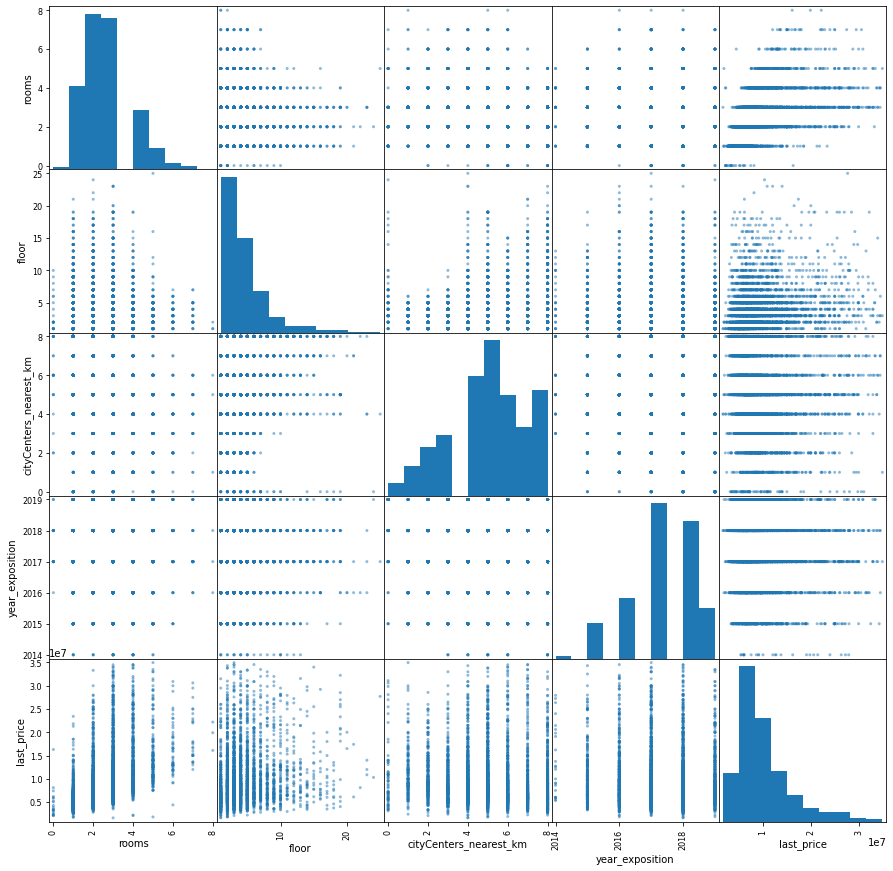

In [45]:
# сохраним два набора данных с нужными нам столбцами
data_spb_center_parameters = data_spb_center[['rooms', 'floor', 'cityCenters_nearest_km', 'year_exposition', 'last_price']]
data_spb_parameters = data_spb[['rooms', 'floor', 'cityCenters_nearest_km', 'year_exposition', 'last_price']]

# построим матрицу рассеяния для центра города
pd.plotting.scatter_matrix(data_spb_center_parameters, figsize=(15,15))
None

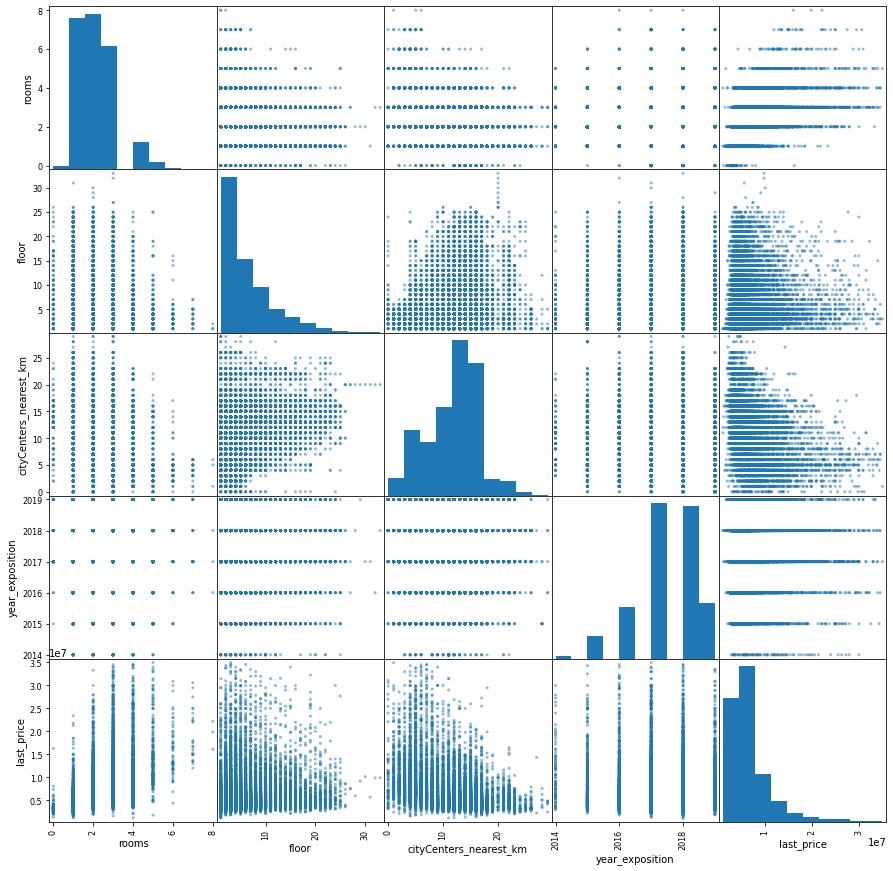

In [46]:
# теперь построим матрицу рассеяния для города целиком
pd.plotting.scatter_matrix(data_spb_parameters, figsize=(15,15))
None

**Вывод:**
* На основе данных из сравнительной таблицы и матрицы рассеяния видим, что в целом параметры квартир более менее схожи. Так, например, потолки в центре немного выше (порядка 18 см.). Однокомнатаных квартир заметно меньше, чем двух- или трехкомнатных. А вот средние значения общей площади и стомости в центре явно превышают значения всей выборки: площадь больше на 18,6 метров, а стоимость квартиры больше на 3,27 млн. рублей.
* По коэффициенту корреляции явно видна зависимость стоимость квартиры от колличества комнат. Стоимость тем больше, чем больше общая площадь квартиры.

## Общий вывод

Подведем итог. Мы провели большую работу над данными, начиная от первичного анализа до заполнения пропущенных значений и изменения типов данных. Расчитали и добавили в таблицу новые метрики, такие как - цена квадратного метра, категории этажей квартир, день/месяц/год объявлений, необходимые для дальнейшего анализа.

В основном представлены квартиры со следующими параметрами:
* Общая площадь от 25 от 100 кв. метров.
* Жилая площадь  от 15 до 50 кв. метров.
* Площадь кухонни от 5 до 20 кв. метров 
* Высота потолков от 2,5 до 3 метров.
* Средняя стоимость находится в  районе 4 млн. рублей. Квадратный метр при этом в среднем стоит от 24 до 200 тыс. рублей.

Благодаря исследовательскому анализу удалось определить основные параметры, определяющие стоимость жилья:
* Площадь. 
* Колличество комнат.
* Удаленность от центра.
* Этаж квартиры.

Касаемо скорости продажи квартир: 
* быстрой можно назвать реализацию, которая прошла меньше чем за 45 дней;
* долгой - свыше 235 дней.

В конце сделали выборку из 10 городов с наибольшим числом объявлений. Определили, что больше всего предложений в Санкт-Петербурге, как оказалось с наибольшей средней стоимостью за квадратный метр чуть больше 110 тыс. рублей.

Дополнительно рассмотрели предложения в центральной части Санкт-Петербурга, а именно в радиусе 8 км. от "импровизировнного" центра. Из анализа видно следующее:
* квартиры здесь стоят дороже, в среднем на 3,27 млн. рублей.
* 3-х комнтаных квартир представлено больше - чуть больше, чем на 1500 предложений.
* а вот однокомнатных нооборот - меньше, практически в 2 раза нежели по всему городу.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод